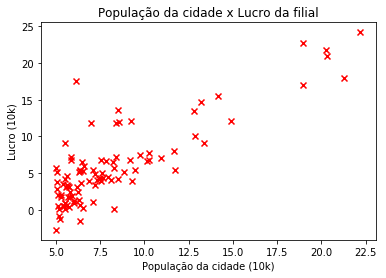

In [159]:
dataset = pd.read_csv('ex1data1.txt', header = None)

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1:].values

plt.scatter(X, Y, color='red', marker='x')
plt.title('População da cidade x Lucro da filial')
plt.xlabel('População da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.savefig('plot1.1.png')
plt.show()

In [172]:
import numpy as np
import os as os
import pandas as pd

filepath = "\ex1data1.txt"

def importarDados(filepath,names):
    path = os.getcwd() + filepath  
    data = pd.read_csv(path, header=None, names=names)

    # adiciona uma coluna de 1s referente a variavel x0
    data.insert(0, 'Ones', 1)
    
    # separa os conjuntos de dados x (caracteristicas) e y (alvo)
    cols = data.shape[1]  
    X = data.iloc[:,0:cols-1]  
    y = data.iloc[:,cols-1:cols]
    
    # converte os valores em numpy arrays
    X = np.array(X.values)  
    y = np.array(y.values)
    
    return X,y

X,y = importarDados(filepath,["Population","Profit"])

In [173]:
# Inicialização dos parâmetros theta
# Recebe o número de variáveis do modelo e o valor inicial dos parâmetros
# e retorna um vetor com todos os parâmetros
#
# Teoricamente, quaisquer valores servem para iniciarmos os parâmetros
# Pois eles serão corrigidos iterativamente pelo gradiente da função custo.

def initParam(n, valor):
  theta = []
  for y in range(n):
    linha = []
    for x in range(1):
      linha.append(valor)
    theta.append(linha)
  return theta

In [178]:
# Inicializando o vetor theta com zero
# Recebe o número de variáveis da matriz de caracterísiticas X e o valor de inicialização
theta = initParam(2,0)

In [179]:
# Taxa de aprendizado
alpha = 0.01

In [180]:
# Função para calcular o custo da função hipótese
import numpy as np

def custo_reglin_uni(X, y, theta):

    # Quantidade de exemplos de treinamento
    m = len(y)

    # Computar a função do custo J
    J = (np.sum((X.dot(theta) - y)**2)) / (2 * m)

    return J

In [181]:
# Recebe o custo da função hipótese
J = custo_reglin_uni(X,y,theta)

In [166]:
# Apresenta o custo
print(J)

32.072733877455676


In [182]:
import numpy as np
from custo_reglin_uni import custo_reglin_uni

def gd_reglin_uni(X, y, alpha, epochs, theta = np.array([0,0], ndmin = 2).T):

    m = len(y)

    cost = np.zeros(epochs)

    for i in range(epochs):

        h = X.dot(theta)

        loss = h - y

        gradient = X.T.dot(loss) / m

        theta = theta - (alpha * gradient)

        cost[i] = custo_reglin_uni(X, y, theta = theta)

    return cost[-1], theta

In [183]:
gd_reglin_uni(X, y, alpha, 5000, theta)

(4.476971396982805, array([[-3.89530051],
        [ 1.19298539]]))

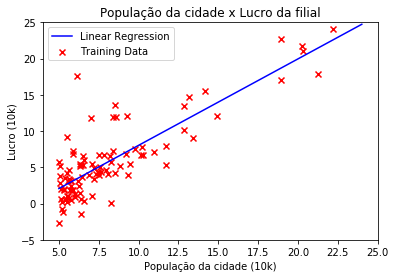

In [184]:
# Visualiza a regressão linear depois da função hipótese ser otimizada pelo GD
import matplotlib.pyplot as plt

dataset = pd.read_csv('ex1data1.txt', header = None)

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1:].values

t = np.arange(5, 25, 1)
plt.scatter(X, y, color='red', marker='x', label='Training Data')
plt.plot(t, -3.89530051 + (1.19298539*t), color='blue', label='Linear Regression')
plt.axis([4, 25, -5, 25])
plt.title('População da cidade x Lucro da filial')
plt.xlabel('População da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.legend()
plt.show()

In [126]:
print("Para uma população de 35.000 habitantes, o lucro será de R$", round(-3.89530051+(1.19298539*35000),2))

Para uma população de 35.000 habitantes, o lucro será de R$ 41750.59


In [127]:
print("Para uma população de 70.000 habitantes, o lucro será de R$", round(-3.89530051+(1.19298539*70000),2))

Para uma população de 70.000 habitantes, o lucro será de R$ 83505.08


<Figure size 432x288 with 0 Axes>

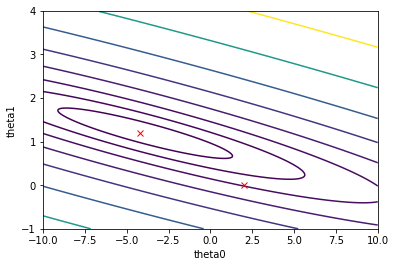

In [2]:
import os as os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# from <package> import <item>
# o item pode ser um subpacote, submódulo, classe, função ou variável.
from custo_reglin_uni import custo_reglin_uni

# Importa os dados
filepath = "\ex1data1.txt"

def importarDados(filepath,names):
    path = os.getcwd() + filepath  
    data = pd.read_csv(path, header=None, names=names)

    # adiciona uma coluna de 1s referente a variavel x0
    data.insert(0, 'Ones', 1)
    
    # separa os conjuntos de dados x (caracteristicas) e y (alvo)
    cols = data.shape[1]  
    X = data.iloc[:,0:cols-1]  
    y = data.iloc[:,cols-1:cols]
    
    # converte os valores em numpy arrays
    X = np.array(X.values)  
    y = np.array(y.values)
    
    return X,y

X,y = importarDados(filepath,["Population","Profit"])

# Valores de theta0 e theta1 informados no enunciado do trabalho
theta0 = np.arange(-10, 10, 0.01)
theta1 = np.arange(-1, 4, 0.01)

# Inicia os valores de J com zeros
J = np.zeros((len(theta0), len(theta1)))

# Preenche os valores sucessivos de J
for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = [[theta0[i]], [theta1[j]]]
        #J[i,j] = custo_reglin_uni(x, y, t)
        J[i,j] = custo_reglin_uni(X, y, t)

# Transpõe J devido as funções contour/meshgrid
J = np.transpose(J)

# Plota a função de custo utilizando levels como logspace. Range -1 ~ 4 devido ao
# range de theta1 e 20 pois o theta0 tem 20 valores (-10 até 10)
fig = plt.figure()
fig, ax = plt.subplots()
ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20))
ax.plot([-4.2,2], [1.2,0], 'rx')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

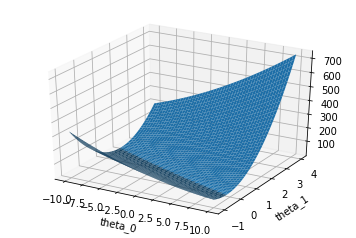

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Valores de theta0 e theta1 informados no enunciado do trabalho
theta0 = np.arange(-10, 10, 0.01)
theta1 = np.arange(-1, 4, 0.01)

# Comandos necessários para o matplotlib plotar em 3D
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plotando o gráfico de superfície
theta0, theta1 = np.meshgrid(theta0, theta1) 
surf = ax.plot_surface(theta0, theta1, J)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

In [5]:
import pandas as pd

filepath = "\Parte2\ex1data2.txt"
path = os.getcwd() + filepath

dataset = pd.read_csv(path, header=None, names=["Size(*)","Bedrooms","Price"])
dataset.head()

,Size(*),Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


(*) in feet<sup>2</sup>

In [6]:
import numpy as np
import os as os
import pandas as pd

filepath = "\Parte2\ex1data2.txt"

def normalizar_caracteristica(X, y):
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    X_norm = (X - mean_X) / std_X
    
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    y_norm = (y - mean_y) / std_y
    
    return X_norm, mean_X, std_X, y_norm, mean_y, std_y


def importarDados(filepath,names):
    path = os.getcwd() + filepath  
    data = pd.read_csv(path, header=None, names=names)

    # adiciona uma coluna de 1s referente a variavel x0
    #data.insert(0, 'Ones', 1)
    
    # separa os conjuntos de dados x (caracteristicas) e y (alvo)
    cols = data.shape[1]  
    X = data.iloc[:,0:cols-1]  
    y = data.iloc[:,cols-1:cols]
    
    # converte os valores em numpy arrays
    X = np.array(X.values)  
    y = np.array(y.values)
    
    return X,y

X,y = importarDados(filepath,["Size","Bedrooms","Price"])

X_norm, mean_X, std_X, y_norm, mean_y, std_y = normalizar_caracteristica(X, y)

print(X_norm, mean_X, std_X, y_norm, mean_y, std_y)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

# Parte 3 - Regressão Logística

Nesta parte do trabalho, executa-se um classificador para predizer se um
estudante será admitido em uma universidade, com base nos resultados de duas
avaliações.

O arquivo ex2data1.txt contém os dados a serem usados. Nesse arquivo, estão
disponíveis dados históricos acerca de realizações passadas dessas
avaliações, e que esses dados históricos podem ser usados como conjunto de
treinamento.

Para cada exemplo desse conjunto de treinamento, temos as notas
das duas avaliaçõese a decisão acerca do candidato (aprovado ou reprovado).

Será apresentado um modelo de classificação que provê uma estimativa
da probabilidade de admissão de um candidato, com base na notas que ele
obteve nas duas avaliações.

## 3.1 Visualização dos dados

Nessa parte do trabalho, será carregado o arquivo ex2data1.txt que contém o conjunto de treinamento e
será plotado (i.e., produzido um gráfico) os pontos de dados.

Abaixo, o script que realiza esse trabalho.

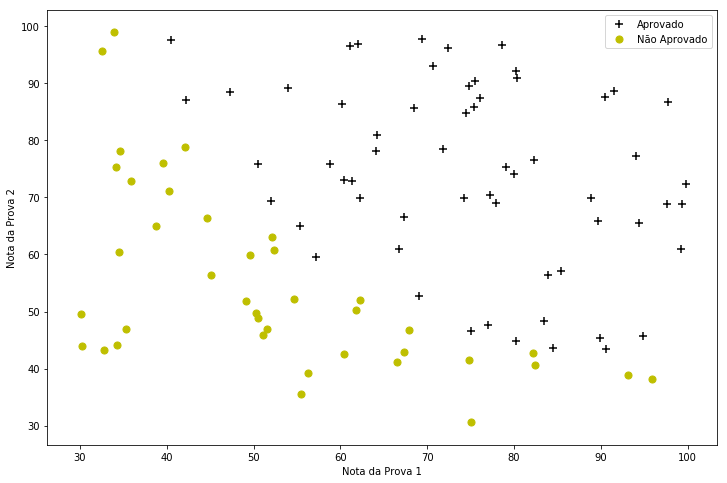

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

# Carregando os dados do dataset e armazendo em um array. Em seguida damos uma rápida visualizada nos dados
data = pd.read_csv('parte3/ex2data1.txt', header=None, names=['Prova 1', 'Prova 2', 'Aprovado'])  
data.head() 

# A primeira coluna, preenchida com 1's, represenhta o theta0
data.insert(0, 'Ones', 1)

# converte de dataframes para arrays
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# converte de arrays para matrizes
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)

# gerando o gráfico de dispersão para análise preliminar dos dados

positivo = data[data['Aprovado'].isin([1])]  
negativo = data[data['Aprovado'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positivo['Prova 1'], positivo['Prova 2'], s=50, c='k', marker='+', label='Aprovado')  
ax.scatter(negativo['Prova 1'], negativo['Prova 2'], s=50, c='y', marker='o', label='Não Aprovado')  
ax.legend()  
ax.set_xlabel('Nota da Prova 1')  
ax.set_ylabel('Nota da Prova 2')
plt.show()

Acima, apresenta-se o resultado da execução do script proposto que é a visualização gráfica dos pontos de dados do conjunto ex2data1.txt.

## 3.2. Implementação

**3.2.1. Função sigmoide**

Abaixo, tem-se alguns testes com a função fornecida no arquivo **sigmoide.py**

In [3]:
from sigmoide import sigmoide
s=sigmoide(0)
print(s)

0.5


Caso o parâmetro passado para essa função seja um valor muito grande e positivo (ou muito grande
e negativo), ela deve retornar um valor muito próximo de 1 (0).

Teste da função para um valor muito grande e positivo:

In [4]:
from sigmoide import sigmoide
s=sigmoide(100000)
print(s)

1.0


Utilizando-se um valor muito grande e negativo:

In [5]:
from sigmoide import sigmoide
s=sigmoide(-100000)
print(s)

0.0


Em particular, se um array de valores for passado para a função, o cálculo é aplicado a cada componente do array:

In [7]:
import numpy as np
from sigmoide import sigmoide
m=np.array([[1,2],[3,4],[5,6]])
s=sigmoide(m)
print(s)

[[0.73105858 0.88079708]
 [0.95257413 0.98201379]
 [0.99330715 0.99752738]]


**3.2.2. Função de custo e gradiente**

Abaixo, temos o script **custo_reglog.py** para a função de custo para a regressão logística.
Observa-se que o gradiente é um vetor com o mesmo número de elementos que $\theta$.

In [10]:
import numpy as np
from sigmoide import sigmoide

def custo_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad0 = np.multiply(-y, np.log(sigmoide(X * theta.T)))
    grad1 = np.multiply((1 - y), np.log(1 - sigmoide(X * theta.T)))
    return np.sum(grad0 - grad1) / (len(X))

Realiza-se abaixo, teste da função **custo_reglog**, considerando-se a matriz de características X,
do vetor resposta Y e o vetor $\theta$ definidos no item 3.1. deste relatório:

In [12]:
J=custo_reglog(theta, X, y)
print(J)

0.6931471805599453


**3.2.3 Aprendizado dos parâmetros**

Na regressão logística, o objetivo é minimizar J($\theta$) com relação ao vetor de
parâmetros $\theta$.

Utilizar-se-á o script do gradiente descendente contido no arquivo **gd_reglog.py** para encontrar o
vetor $\theta$ que minimiza a função de custo.

Teste da função **gd_reglog**.

In [19]:
from custo_reglog import custo_reglog
from gd_reglog import gd_reglog
import scipy.optimize as opt
result = opt.fmin_tnc(func=custo_reglog, x0=theta, fprime=gd_reglog, args=(X, y))
custo_reglog(result[0], X, y)

0.20349770158947464

**3.2.4 Avaliação do modelo**

Após o aprendizado dos parâmetros, utiliza-se o modelo correspondente
para predizer se um candidato qualquer será aprovado. Para um candidato
com notas 45 e 85 na primeira e segunda avaliações, respectivamente, 
espera-se que ele seja aprovado com probabilidade aproximada de 80%.
Outro modo de avaliar a qualidade dos parâmetros é verificar o quão bem
o modelo aprendido prediz os pontos de dados do conjunto de treinamento.

Abaixo, apresenta-se uma função denominada **predizer** no arquivo **predizer_aprovacao.py**.

In [31]:
import numpy as np
from sigmoide import sigmoide

def predizer(theta, X):
    ############################
    # Essa função deve retornar a classe prevista (1 ou 0) para cada exemplo em X
    ############################
    probabilidade = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]
    
def acuracia(X, theta, result):
    theta_min = np.matrix(result[0])  
    predicoes = predizer(theta_min, X)  
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]  
    acc = (sum(map(int, corretas)) % len(corretas))  
    print('Accurácia {0}%'.format(acc))

Para os dez primeiros exemplos do conjunto de treinamento, será realizada a predição, considerando-se as avaliações
dos alunos, conforme pode-se observar abaixo:

# 4 Regressão Logística com Regularização

Nesta parte do trabalho, será apresentado a regressão logística regularizada
para prever se os microchips de uma usina de fabricação passam na garantia de
qualidade (QA). Durante realização da atividade de QA, cada microchip passa
por vários testes para garantir se está funcionando corretamente. Considerando-se resultados de teste para alguns microchips em dois testes diferentes. A partir desses dois testes,
determina-se se os microchips deveriam ser aceitos ou rejeitados. Para uma tomada de decisão, tem-se um conjunto de dados de resultados de testes anteriores sobre microchips, a partir do qual pode-se construir um
modelo de regressão logística. O arquivo **ex2data2.txt** contém os dados a serem usados nessa parte do
trabalho. A primeira coluna corresponde aos resultados do primeiro teste, enquanto que a segunda coluna corresponde aos resultados do segundo teste. A terceira coluna contém os valores da classe: y = 0 significa rejeitado no teste, e
y = 1 significa aceito no teste.

## **4.1 Visualização dos Dados**

Para a maioria dos conjuntos de dados do mundo real, não é possível criar um gráfico para visualizar seus pontos. Mas, para o conjunto de dados fornecido, isso é possível. Abaixo, um script que produz um gráfico de dispersão (scatter plot) dos dados fornecidos.

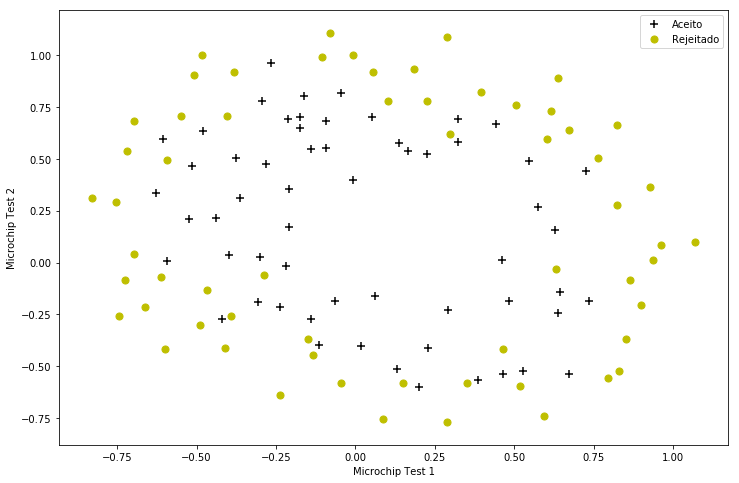

In [40]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

# Carregando os dados do dataset e armazendo em um array. Em seguida damos uma rápida visualizada nos dados
data = pd.read_csv('parte4/ex2data2.txt', header=None, names=['Microchip Test 1', 'Microchip Test 2', 'Aceito'])  
data.head() 

# A primeira coluna, preenchida com 1's, represenhta o theta0
data.insert(0, 'Ones', 1)

# converte de dataframes para arrays
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]

# converte de arrays para matrizes
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(3)

# gerando o gráfico de dispersão para análise preliminar dos dados

positivo = data[data['Aceito'].isin([1])]  
negativo = data[data['Aceito'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positivo['Microchip Test 1'], positivo['Microchip Test 2'], s=50, c='k', marker='+', label='Aceito')  
ax.scatter(negativo['Microchip Test 1'], negativo['Microchip Test 2'], s=50, c='y', marker='o', label='Rejeitado')  
ax.legend()  
ax.set_xlabel('Microchip Test 1')  
ax.set_ylabel('Microchip Test 2')

plt.show()

Acima, temos os pontos de dados do conjunto **ex2data2.txt**.